In [4]:
import pandas as pd
import numpy as np
import datetime

from matplotlib import font_manager, rc, rcParams
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [5]:
import warnings
warnings.filterwarnings('ignore')

# 맵핑한 데이터 임포팅

In [6]:
df = pd.read_csv('news_stock_OK.csv', encoding = 'utf-8 sig')
df.head()

,Unnamed: 0,Date,NOUNS,Open,High,Low,Close,Adj Close,Volume,day1C,...,Diff5,Diff10,Diff1_per,Diff3_per,Diff5_per,Diff10_per,Diff1_clf,Diff3_clf,Diff5_clf,Diff10_clf
0,99,2017-12-15,"['부고', '송창', '씨', '법무', '법인', '세한', '변호사', '부친...",51240.0,51480.0,50520.0,50620.0,17585.119141,14928550.0,51060.0,...,-1380.0,-220.0,-0.87,-2.92,-2.73,-0.43,-1등급,-2등급,-2등급,-1등급
1,102,2017-12-18,"['주가', '반토막', '삼성', '중공업', '뒷북', '증권사', '뉴스', ...",50620.0,51240.0,50620.0,51200.0,17786.607422,7350250.0,50620.0,...,-580.0,-140.0,1.13,-0.23,-1.13,-0.27,+2등급,-1등급,-2등급,-1등급
2,103,2017-12-19,"['배당', '계절', '개인', '접근', '로', '배당', '주', '투자',...",51540.0,52080.0,51520.0,51560.0,17911.669922,11978600.0,51200.0,...,-540.0,300.0,0.70,0.97,-1.05,0.58,+1등급,+1등급,-2등급,+1등급
3,105,2017-12-21,"['공정위', '삼성', '물산', '합병', '가이드라인', '개정', '논란',...",51000.0,51060.0,49100.0,49140.0,17070.974609,15624300.0,51560.0,...,-2180.0,-880.0,-4.92,-3.01,-4.44,-1.79,-3등급,-3등급,-3등급,-2등급
4,106,2017-12-22,"['스팟', '삼성', '전자', '오른', '출발', '삼성', '전자', '출발...",49400.0,49960.0,49240.0,49700.0,17265.515625,11199650.0,49140.0,...,-1360.0,-1040.0,1.13,-3.02,-2.74,-2.09,+2등급,-3등급,-2등급,-2등급


### 칼럼 너무 많아서 df_original에다가 보존시키고 내가 쓰는 것만 df로 작업

In [7]:
# 복제
df_original = df.copy()
df.columns

Index(['Unnamed: 0', 'Date', 'NOUNS', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'day1C', 'day3C', 'day5C', 'day10C', 'day1V',
       'day3V', 'day5V', 'day10V', 'ma1C', 'ma3C', 'ma5C', 'ma10C', 'ma1V',
       'ma3V', 'ma5V', 'ma10V', 'Diff1', 'Diff3', 'Diff5', 'Diff10',
       'Diff1_per', 'Diff3_per', 'Diff5_per', 'Diff10_per', 'Diff1_clf',
       'Diff3_clf', 'Diff5_clf', 'Diff10_clf'],
      dtype='object')

In [8]:
# 칼럼 삭제
df.drop(['Unnamed: 0', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace = True)

In [9]:
df.columns

Index(['Date', 'NOUNS', 'Open', 'Close', 'day1C', 'day3C', 'day5C', 'day10C',
       'day1V', 'day3V', 'day5V', 'day10V', 'ma1C', 'ma3C', 'ma5C', 'ma10C',
       'ma1V', 'ma3V', 'ma5V', 'ma10V', 'Diff1', 'Diff3', 'Diff5', 'Diff10',
       'Diff1_per', 'Diff3_per', 'Diff5_per', 'Diff10_per', 'Diff1_clf',
       'Diff3_clf', 'Diff5_clf', 'Diff10_clf'],
      dtype='object')

In [10]:
df.head()

,Date,NOUNS,Open,Close,day1C,day3C,day5C,day10C,day1V,day3V,...,Diff5,Diff10,Diff1_per,Diff3_per,Diff5_per,Diff10_per,Diff1_clf,Diff3_clf,Diff5_clf,Diff10_clf
0,2017-12-15,"['부고', '송창', '씨', '법무', '법인', '세한', '변호사', '부친...",51240.0,50620.0,51060.0,52100.0,52000.0,50840.0,20310400.0,8765050.0,...,-1380.0,-220.0,-0.87,-2.92,-2.73,-0.43,-1등급,-2등급,-2등급,-1등급
1,2017-12-18,"['주가', '반토막', '삼성', '중공업', '뒷북', '증권사', '뉴스', ...",50620.0,51200.0,50620.0,51320.0,51780.0,51340.0,14928550.0,11333700.0,...,-580.0,-140.0,1.13,-0.23,-1.13,-0.27,+2등급,-1등급,-2등급,-1등급
2,2017-12-19,"['배당', '계절', '개인', '접근', '로', '배당', '주', '투자',...",51540.0,51560.0,51200.0,51060.0,52100.0,51260.0,7350250.0,20310400.0,...,-540.0,300.0,0.70,0.97,-1.05,0.58,+1등급,+1등급,-2등급,+1등급
3,2017-12-21,"['공정위', '삼성', '물산', '합병', '가이드라인', '개정', '논란',...",51000.0,49140.0,51560.0,50620.0,51320.0,50020.0,11978600.0,14928550.0,...,-2180.0,-880.0,-4.92,-3.01,-4.44,-1.79,-3등급,-3등급,-3등급,-2등급
4,2017-12-22,"['스팟', '삼성', '전자', '오른', '출발', '삼성', '전자', '출발...",49400.0,49700.0,49140.0,51200.0,51060.0,50740.0,15624300.0,7350250.0,...,-1360.0,-1040.0,1.13,-3.02,-2.74,-2.09,+2등급,-3등급,-2등급,-2등급


# ========================================================

# 이제 통계분석 시작
- https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
- https://ratsgo.github.io/machine%20learning/2017/05/18/naive/
1. Naive Basian

In [11]:
df.head()

,Date,NOUNS,Open,Close,day1C,day3C,day5C,day10C,day1V,day3V,...,Diff5,Diff10,Diff1_per,Diff3_per,Diff5_per,Diff10_per,Diff1_clf,Diff3_clf,Diff5_clf,Diff10_clf
0,2017-12-15,"['부고', '송창', '씨', '법무', '법인', '세한', '변호사', '부친...",51240.0,50620.0,51060.0,52100.0,52000.0,50840.0,20310400.0,8765050.0,...,-1380.0,-220.0,-0.87,-2.92,-2.73,-0.43,-1등급,-2등급,-2등급,-1등급
1,2017-12-18,"['주가', '반토막', '삼성', '중공업', '뒷북', '증권사', '뉴스', ...",50620.0,51200.0,50620.0,51320.0,51780.0,51340.0,14928550.0,11333700.0,...,-580.0,-140.0,1.13,-0.23,-1.13,-0.27,+2등급,-1등급,-2등급,-1등급
2,2017-12-19,"['배당', '계절', '개인', '접근', '로', '배당', '주', '투자',...",51540.0,51560.0,51200.0,51060.0,52100.0,51260.0,7350250.0,20310400.0,...,-540.0,300.0,0.70,0.97,-1.05,0.58,+1등급,+1등급,-2등급,+1등급
3,2017-12-21,"['공정위', '삼성', '물산', '합병', '가이드라인', '개정', '논란',...",51000.0,49140.0,51560.0,50620.0,51320.0,50020.0,11978600.0,14928550.0,...,-2180.0,-880.0,-4.92,-3.01,-4.44,-1.79,-3등급,-3등급,-3등급,-2등급
4,2017-12-22,"['스팟', '삼성', '전자', '오른', '출발', '삼성', '전자', '출발...",49400.0,49700.0,49140.0,51200.0,51060.0,50740.0,15624300.0,7350250.0,...,-1360.0,-1040.0,1.13,-3.02,-2.74,-2.09,+2등급,-3등급,-2등급,-2등급


In [12]:
# train_test 나누기
from sklearn.model_selection import train_test_split

# X에는 뉴스에서 추출한 명사 데이터만
X = df['NOUNS']

# y에는 주가상승/하락 정리한 범주형 데이터로 비교
y = df.loc[:, ['Diff1_clf', 'Diff3_clf', 'Diff5_clf', 'Diff10_clf']]

# X훈련,테스트 / y훈련,테스트
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

## 분석 전, 데이터 가공 (토큰화, 벡터 -> tf/idf -> 분석 -> 테스트)
### Tokenizing text with
- https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#tokenizing-text-with-scikit-learn
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
- https://datascienceschool.net/view-notebook/3e7aadbf88ed4f0d87a76f9ddc925d69/

In [21]:
# 학습시킬 때 칼럼이 두 개 있으면 오류가 나서 일자별로 자르는 과정
y_train1 = y_train.iloc[:,0]
y_train2 = y_train.iloc[:,1]
y_train3 = y_train.iloc[:,2]
y_train4 = y_train.iloc[:,3]

y_test1 = y_test.iloc[:,0]
y_test2 = y_test.iloc[:,1]
y_test3 = y_test.iloc[:,2]
y_test4 = y_test.iloc[:,3]

y1 = y.iloc[:,0]
y2 = y.iloc[:,1]
y3 = y.iloc[:,2]
y4 = y.iloc[:,3]

In [13]:
# 데이터 토크나이징 전
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(230,)
(13,)
(230, 4)
(13, 4)


In [17]:
# 데이터 벡터 형태로 토크나이징
# 이 방법으로 토크나이징 하는게 맞나?? tf/idf같은 형식도 있던데??
# 스탑워드는 따로 처리 안해도 되나??
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

# fit과 fit_transform의 차이는?? return term-document matrix 추가진행
# fit_transform(..)은 두 과정을 한 방에 하려고 붙인 것
X_train_counts = count_vect.fit_transform(X_train)
print(X_train_counts.shape)

X_test_counts = count_vect.fit_transform(X_test)
print(X_test_counts.shape)
# fit은 shape로 모양을 찍어볼 수 없다.

(230, 28195)
(13, 8220)


## 문서 길이가 길어지면 카운팅 값이 자연스레 높아져서 뭔가 불공평함
- 그럴 때 tf/idf 토크나이징 사용...이 맞나??
- 다른 단어와의 상대적 중요성이 필요할 때는 좋을 것 같지만, 주가 예측에 어떤 단어가 핫했나를 따지려면 굳이 필요 없을 듯...??

In [19]:
# 토크나이징한 x의 벡터값들을 tf로 변환하는 과정
# fit과 transform 진행
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.naive_bayes import MultinomialNB


# 아까 벡터화한거 넣어서 fit과 transform
train_tfidf_transformer = TfidfTransformer(use_idf=True).fit(X_train_counts) 
X_train_tfidf = train_tfidf_transformer.transform(X_train_counts)

test_tfidf_transformer = TfidfTransformer(use_idf=True).fit(X_test_counts) 
X_test_tfidf = test_tfidf_transformer.transform(X_test_counts)

In [23]:
print(X_train_tfidf.shape)
print(y_train3.shape)
print(X_test_tfidf.shape)
print(y_test3.shape)

(230, 28195)
(230,)
(13, 8220)
(13,)


In [25]:
nb_clf = MultinomialNB().fit(X_train_tfidf, y_train3)
test_predicted3 = nb_clf.predict(X_train_tfidf)

print(X_train_tfidf.shape)
print(test_predicted3.shape)

print('======== 5일치 예측 ========')
print('tfidf로 변환한 예측률 :',np.mean(test_predicted3 == y_train3))

(230, 28195)
(230,)
======== 5일치 예측 ========
tfidf로 변환한 예측률 : 0.21304347826086956


In [26]:
print('======== 1일치 예측 ========')
clf_tfidf = MultinomialNB().fit(X_train_tfidf, y1)
predicted1 = clf_tfidf.predict(X_train_tfidf)
print('tfidf로 변환한 예측률 :',np.mean(predicted1 == y1))

print('======== 3일치 예측 ========')
clf_tfidf = MultinomialNB().fit(X_train_tfidf, y2)
predicted2 = clf_tfidf.predict(X_train_tfidf)
print('tfidf로 변환한 예측률 :',np.mean(predicted2 == y2))

print('======== 5일치 예측 ========')
clf_tfidf = MultinomialNB().fit(X_train_tfidf, y3)
predicted3 = clf_tfidf.predict(X_train_tfidf)
print('tfidf로 변환한 예측률 :',np.mean(predicted2 == y3))

print('======== 10일치 예측 ========')
clf_tfidf = MultinomialNB().fit(X_train_tfidf, y4)
predicted4 = clf_tfidf.predict(X_train_tfidf)
print('tfidf로 변환한 예측률 :',np.mean(predicted4 == y4))

======== 1일치 예측 ========


ValueError: Found input variables with inconsistent numbers of samples: [230, 243]

In [464]:
print('======== 1일치 예측값 나열 ========')
print(predicted1)
print('y1값 분포 : \n', y1.value_counts())
print('tfidf로 변환한 예측률 :',np.mean(predicted1 == y1), end = '\n\n')


print('======== 3일치 예측값 나열 ========')
print(predicted2)
print('y2값 분포 : \n', y2.value_counts())
print('tfidf로 변환한 예측률 :',np.mean(predicted2 == y2), end = '\n\n')


print('======== 5일치 예측값 나열 ========')
print(predicted3)
print('y3값 분포 : \n', y3.value_counts())
print('tfidf로 변환한 예측률 :',np.mean(predicted3 == y3), end = '\n\n')


print('======== 10일치 예측값 나열 ========')
print(predicted4)
print('y4값 분포 : \n', y4.value_counts())
print('tfidf로 변환한 예측률 :',np.mean(predicted4 == y4), end = '\n\n')

======== 1일치 예측값 나열 ========
[ 1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1
 -1 -1  1 -1 -1  1 -1 -1  1  1  1  1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1
  1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1  1 -1 -1  1  1 -1 -1 -1  1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1
 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1  1  1 -1 -1  1 -1
 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1  1 -1  1  1  1  1  1 -1 -1  1
 -1 -1 -1 -1 -1  1 -1  1  1  1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1
  1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1
 -1  1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
 -1 -1 -1 -1  1 -1  1  1 -1 -1  1  1  1]
y1값 분포 : 
 -1    93
 1    91
-2    37
 2    26
-3     3
 3     3
Name: Diff1_clf, dtype: int64
tfidf로 변환한 예측률 : 0.691699604743083

======== 3일치 예측값 나열 ========
[-1 -1 -1 -1 -1 -1 -1 -2 -1  1 -2 -2 -1 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000246287FC828>,
      dtype=object)

<Figure size 3600x1440 with 0 Axes>

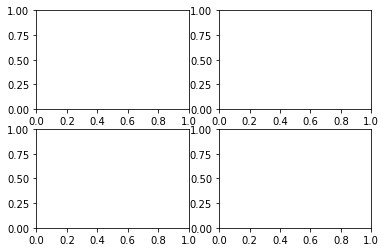

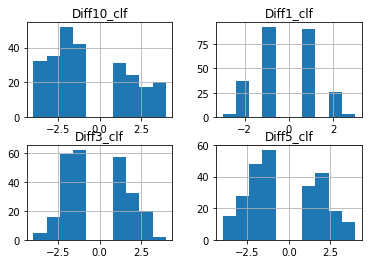

In [96]:
# We can set the number of bins with the `bins` kwarg
figure(figsize=(50,20))
fig.savefig('foo.png')        
fig, ax = plt.subplots( nrows=2, ncols=2 )
y.hist()

In [466]:
print(X.shape)
print(y.shape)

(253,)
(253, 4)


In [91]:
from sklearn.naive_bayes import MultinomialNB
clf_tfidf = MultinomialNB().fit(X_train_tfidf, y3)   # X_train_tfidf, twenty_train.target

In [98]:
# Test셋 벡터로 변환
X_test_counts = count_vect.transform(X)
X_train_tfidf = tfidf_transformer.transform(X_test_counts)
predicted = clf_tfidf.predict(X_train_tfidf)

print('======== 5일치 예측 ========')
print('tfidf로 변환한 예측률 :',np.mean(predicted == y3))

======== 5일치 예측 ========
tfidf로 변환한 예측률 : 0.0


## 학습시킨 모델을 Test셋으로 비교

In [22]:
# 예측한 값이 predicted에 들어감
print(predicted.shape)  # X_train->벡터->tfidf를 학습시켜 분류한 결과

# 비교에 쓸 y_test 형태 파악
print(y_test3.shape)

(51,)
(51,)


In [23]:
print('======== 1일치 예측 ========')
print('tfidf로 변환한 예측률 :',np.mean(predicted == y_test1))

print('======== 3일치 예측 ========')
print('tfidf로 변환한 예측률 :',np.mean(predicted == y_test2))



print('======== 10일치 예측 ========')
print('tfidf로 변환한 예측률 :',np.mean(predicted == y_test4))

======== 1일치 예측 ========
tfidf로 변환한 예측률 : 0.3137254901960784
======== 3일치 예측 ========
tfidf로 변환한 예측률 : 0.29411764705882354
======== 5일치 예측 ========
tfidf로 변환한 예측률 : 0.13725490196078433
======== 10일치 예측 ========
tfidf로 변환한 예측률 : 0.13725490196078433


# Building a pipeline
- 분석기 이름 : nb_clf

In [108]:
from sklearn.pipeline import Pipeline
nb_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

#  Evaluation of the performance on the 'Test' set
- 파이프라인에는 tfidf사용

In [118]:
# X트레인과 1일치y트레인 학습시켜 모델 구축
nb_clf.fit(X, y1) 

# 만든 모델로 X테스트 학습 => y테스트 예측률 평가
nb_predicted1 = nb_clf.predict(X)

print('======== TestSet 1일치 예측 ========')
np.mean(nb_predicted1 == y1) 

======== TestSet 1일치 예측 ========


0.4031620553359684

In [120]:
# X트레인과 1일치y트레인 학습시켜 모델 구축
nb_clf.fit(X, y2) 

# 만든 모델로 X테스트 학습 => y테스트 예측률 평가
nb_predicted2 = nb_clf.predict(X)

print('======== TestSet 3일치 예측 ========')
np.mean(nb_predicted1 == y2) 

======== TestSet 3일치 예측 ========


0.233201581027668

In [122]:
# X트레인과 1일치y트레인 학습시켜 모델 구축
nb_clf.fit(X, y3) 

# 만든 모델로 X테스트 학습 => y테스트 예측률 평가
nb_predicted3 = nb_clf.predict(X)

print('======== TestSet 5일치 예측 ========')
np.mean(nb_predicted1 == y3) 

======== TestSet 5일치 예측 ========


0.15019762845849802

In [124]:
# X트레인과 1일치y트레인 학습시켜 모델 구축
nb_clf.fit(X, y4) 

# 만든 모델로 X테스트 학습 => y테스트 예측률 평가
nb_predicted4 = nb_clf.predict(X)

print('======== TestSet 10일치 예측 ========')
np.mean(nb_predicted1 == y4) 

======== TestSet 10일치 예측 ========


0.13043478260869565

## SVM - SGDClassifier

In [114]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
svm_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=5, tol=None)),
])

svm_clf.fit(X_train, y_train4)  

predicted = svm_clf.predict(X_test)
np.mean(predicted == y_test4)

0.21568627450980393

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test3, predicted,
    target_names=['-4','-3','-2','-1','1','2','3','4']))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test3, predicted)

# SVC
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-3-7-%EC%BB%A4%EB%84%90-%EC%84%9C%ED%8F%AC%ED%8A%B8-%EB%B2%A1%ED%84%B0-%EB%A8%B8%EC%8B%A0/

In [251]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
clf_svc = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SVC(gamma=0.1, class_weight = "balanced", kernel='rbf', C=10)),
])

clf_svc.fit(X_train, y_train4)
print('훈련 셋 검증결과 : {:.3f}.'.format(clf_svc.score(X_train, y_train4)))
print('테스트 셋 검증결과 : {:.3f}.'.format(clf_svc.score(X_test, y_test4)))
print(clf_svc.predict(X_train))

훈련 셋 검증결과 : 0.975.
테스트 셋 검증결과 : 0.235.
[-4  1 -1 -4 -1 -2 -3  4  2 -1  1 -1 -3  1  1 -2  2 -1 -2  1 -1 -4 -4 -1
 -3 -1  4  2 -3  2  3  3 -2  3 -2 -3  4 -2  4 -1 -4  1  1  4 -2 -1 -4 -1
  2  1  4  1 -3 -3  2 -1 -2  3 -1 -4 -2  1 -2 -2 -4 -1 -3 -1 -2 -2  4 -2
 -1  3 -4 -2 -1 -1 -4 -3 -2  2 -4 -1 -1 -2 -4 -4 -2 -3  3 -2  2  4  4 -4
  1 -1 -1  1  1  2  1 -3 -2  4  4 -2  2  1  3 -2 -1 -4  1 -3 -2  1 -2 -4
  1 -1  2 -2  1  2 -3  4  1  1  2  1 -2 -4 -3  1  4 -1  2 -2 -2  1 -1  3
 -4 -4  1 -3 -1 -2  1 -2 -1 -3 -2 -2  3 -4 -1 -4 -2 -1 -4 -3 -4  2  3 -1
 -4  4  2  2  1 -1 -1  3 -2  1 -3 -1  1 -4  4 -3 -1 -3  3 -3 -3 -1 -3 -2
 -3 -1  4 -4 -2 -2 -2  4 -1 -3]


In [252]:
clf_svc = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SVC(gamma=0.1, class_weight = "balanced", kernel='rbf', C=1)),
])

clf_svc.fit(X_train, y_train4) 
print('훈련 셋 검증결과 : {:.3f}.'.format(clf_svc.score(X_train, y_train4)))
print('테스트 셋 검증결과 : {:.3f}.'.format(clf_svc.score(X_test, y_test4)))
print(clf_svc.predict(X_train))

훈련 셋 검증결과 : 0.213.
테스트 셋 검증결과 : 0.176.
[-2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2]


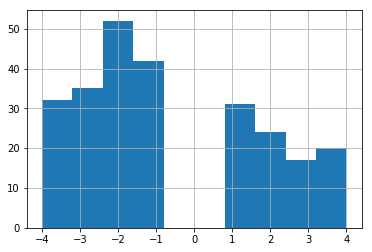

In [195]:
y4.hist()

# Feature Selection
- 멘토님 시킨거
- LDA

## 1. Removing low variance feature

In [386]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.001))
X_varianceTh = sel.fit_transform(X_train_tfidf)
X_varianceTh

<253x83 sparse matrix of type '<class 'numpy.float64'>'
	with 9477 stored elements in Compressed Sparse Row format>

In [387]:
# 분산도를 기준으로 잘라낸 피처
X_train, X_test2, y_train2, y_test2 = train_test_split(X_varianceTh, y, test_size = 0.2)

In [409]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
svc = SVC(gamma=0.1, class_weight = "balanced", kernel='rbf', C=10)

clf_svc = svc.fit(X_train2, y_train4) 
print('훈련 셋 검증결과 : {:.3f}.'.format(clf_svc.score(X_train2, y_train4)))
print('테스트 셋 검증결과 : {:.3f}.'.format(clf_svc.score(X_test2, y_test4)))
print(clf_svc.predict(X_train2))

훈련 셋 검증결과 : 0.391.
테스트 셋 검증결과 : 0.176.
[-4 -3 -3  3  1  1 -3 -3 -3 -1 -3 -1 -3 -1 -3 -3 -3 -1  3 -3 -4 -4 -4 -3
  3 -1 -4 -1 -3 -3  3  3 -2 -3 -4 -3 -3 -2 -3 -1 -4  1 -3  4 -3 -4 -4 -1
  2 -2 -3 -3 -3 -3 -4 -1 -3  3  3 -3 -4  1 -3 -4 -4 -3 -3 -4 -2 -2 -3 -2
 -3  3 -4 -2 -1 -3 -1 -3 -3  2 -4 -3 -3  1 -4 -4 -3  2 -3 -3  2 -2 -3 -3
  1 -3 -1  1 -3 -3 -4 -3 -3 -3 -3 -3  2 -3  3 -3 -4 -4  3 -4 -3 -4 -2 -3
 -3 -3 -1 -3 -4 -3 -3  4 -3 -3 -3  1 -3 -4 -3 -3  3  3  4 -3 -3  3 -3 -1
 -3 -4  1  1 -3 -2 -3 -3 -3 -3 -4  1 -4  2 -3 -4 -3 -1  1 -3  3  3  3 -3
 -4 -3 -3  2 -3 -4 -1 -3 -2 -3 -3 -4 -3 -4 -3  3 -3 -3  3 -3 -3 -3 -3 -3
 -3 -2  1  3 -1 -2 -3 -3 -1 -3]


## 2. chi2

### 10일치 주가예측
- 1try : k=20000 / c=100 / gamma=0.01 => 0.385
- 2try : k=5000 / c=100 / gamma=0.01 => 0.314
- 3try : k=5000 / c=150 / gamma=0.01 => 0.333
- 4try : k=5000 / c=500 / gamma=0.01 => 0.333

In [686]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new = SelectKBest(chi2, k=10000).fit_transform(X_train_tfidf, y3)
X_new.shape

(253, 10000)

In [687]:
# chi제곱 기준으로 잘라낸 피처
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_new, y4, test_size = 0.1)

In [688]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
svc = SVC(gamma = 0.01, class_weight = "balanced", kernel='rbf', C = 100)

clf_svc = svc.fit(X_train3, y_train3)
print('훈련 셋 검증결과 : {:.3f}.'.format(clf_svc.score(X_train3, y_train3)))
print('테스트 셋 검증결과 : {:.3f}.'.format(clf_svc.score(X_test3, y_test3)))
print(clf_svc.predict(X_train3))

훈련 셋 검증결과 : 0.960.
테스트 셋 검증결과 : 0.423.
[ 1  2  2 -4 -4 -4 -1  1 -2 -1 -1  1 -2  3 -4  3 -4 -2  4 -3 -2  1  1 -3
 -1 -2 -1 -3  2 -2 -4 -2 -3 -1 -3  3 -2  4  4 -3  2  3 -2  4  4  2 -3 -4
  2 -3 -4 -2  1 -1 -4  2  2 -3  3  3 -1 -1 -1  4 -1 -4 -2  1  4  1  2  1
 -2  4 -2 -3 -3  4  4  3 -2 -2 -2 -3  3  2  2 -2 -3 -2 -1 -1  1 -2 -3 -4
  1 -2  1 -2  1 -2 -4  2 -3 -2 -3  3 -4 -4  2 -1 -2 -4 -3 -1 -1 -4  1  3
 -1  3 -3  4 -4  2  2  1 -3 -4 -1 -1 -4  3 -1  1  2 -1  3 -2 -1 -4 -3 -4
  1  2  3 -1 -1  3 -3 -1 -2 -2 -4 -3  1 -3 -1 -3 -1 -3  4  1  1 -2 -2 -3
 -2  1  1  2 -2 -1  2 -3 -2 -1  1  3 -1  1 -4  4 -4 -4 -4 -3 -3 -2 -1 -2
 -2  1  2 -1 -2 -2 -3  2  4  3 -2 -2 -1 -4  1  4 -2  2 -2 -2 -2 -1 -3  4
  2  4  4 -4  1  1 -3 -1 -4  1 -4]


In [662]:
X_test3.shape

(3, 20000)

(253, 3000)

# Parameter tuning using grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': (True, False),
    'clf__alpha': (1e-2, 1e-3),   # 0.01 or 0.001
}

In [ ]:
gs_clf = GridSearchCV(text_clf, parameters, cv=5, iid=False, n_jobs=-1)

In [ ]:
gs_clf = gs_clf.fit(X_train, y_train1)

In [ ]:
text_clf.predict(X_test)

In [ ]:
Grid_predicted = gs_clf.predict(X_test)

In [ ]:
# 하이퍼 파라미터 돌린 모델 예측률 추정
np.mean(Grid_predicted == y_test1) 

In [ ]:
gs_clf.best_score_                                  

for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

In [ ]:
%matplotlib inline

rcParams['axes.unicode_minus'] = False  # - 기호 깨짐 방지
font_fname = 'C:\Windows\Fonts\D2Coding.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
print(font_family)
rc('font', family=font_family)

from matplotlib import font_manager
font_manager._rebuild()

In [ ]:
unique, counts = np.unique(predicted1, return_counts = True)

print(unique, counts)

In [ ]:
fitting model on training data and transforming to test data????

In layman's terms, fit_transform means to do some calculation and then do transformation 
(say calculating the means of columns from some data and then replacing the missing values). 

So for training set, you need to both calculate and do transformation.

But for testing set, Machine learning applies prediction based on what was learned 
during the training set and so it doesn't need to calculate, it just performs the transformation.

In [ ]:
Code
import numpy as np
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
# 훈련 세트를 섞어 모든 교차 검증 폴드가 비슷해지도록 만들었습니다. 특정 학습 알고리즘은 훈련 샘플의 순서에 민감하게 반응해서 많은 비슷한 샘플이 연이어 나타나면 성능이 나빠집니다. 데이터셋을 섞으면 이러한 문제를 방지할 수 있습니다.

In [ ]:
# shift()함수는 밑으로 내리는 것
# 그 전날꺼를 오른쪽에 붙이는 거 
# day1C는 1일 전꺼의 가격을 의미
df['day1C'] = df['Close'].shift(1)